In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
print (train_images.shape) # Pay attention to this and test_images shape, 
print (len(train_labels))  # convolution layers doesn`t work with 
print (test_images.shape)  # kind of shape.
print (len(test_labels))

(60000, 28, 28)
60000
(10000, 28, 28)
10000


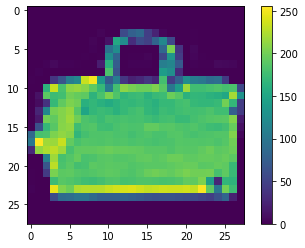

In [6]:
plt.figure()
plt.imshow(train_images[99])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

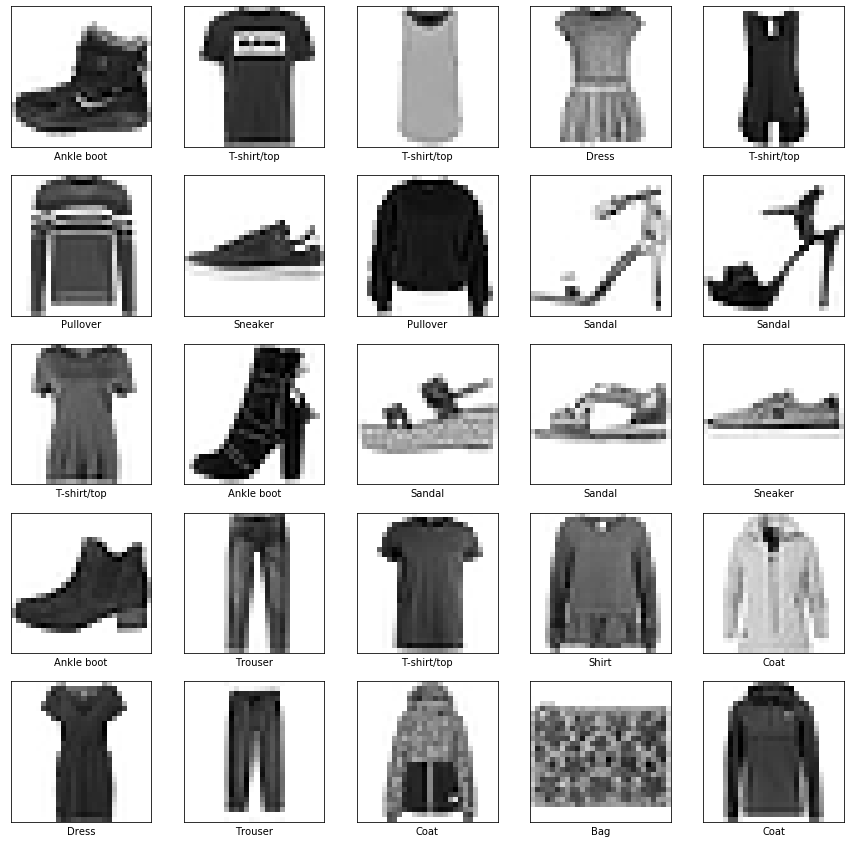

In [8]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([
    
    keras.layers.Conv2D(64, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(128, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(256, kernel_size=3, activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(input_shape=(28, 28)),
    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

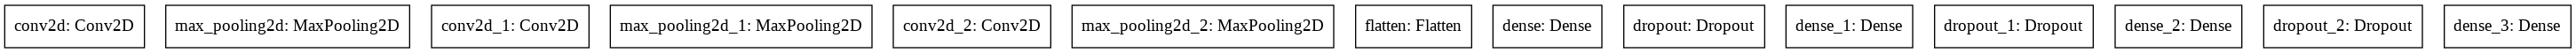

In [13]:
plot_model(model, to_file='model_plot.png')

In [0]:
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1) 

In [15]:
model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.7309 - acc: 0.7313
Epoch 2/10
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.4670 - acc: 0.8358
Epoch 3/10
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.3834 - acc: 0.8673
Epoch 4/10
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.3343 - acc: 0.8852
Epoch 5/10
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.3061 - acc: 0.8939
Epoch 6/10
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.2827 - acc: 0.9010
Epoch 7/10
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.2631 - acc: 0.9088
Epoch 8/10
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.2497 - acc: 0.9124
Epoch 9/10
60000/60000 [==============================] - 178s 3ms/sampl

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nТочность на проверочных данных:', test_acc)

10000/10000 - 6s - loss: 0.3287 - acc: 0.8967

Точность на проверочных данных: 0.8967


In [0]:
model.save('my_model.h5')